In [2]:
import json 
import pandas as pd 
import numpy as np 
import re 

In [3]:
file_dir = 'C://Users/penlo/OneDrive/Desktop/Analysis Projects/Movies-ETL/'

In [4]:
with open(f'{file_dir}wikipedia-movies.json', mode='r') as file:
    wiki_movies_raw = json.load(file)

In [5]:
len(wiki_movies_raw)

7311

In [6]:
wiki_movies_raw[:1]

[{'url': 'https://en.wikipedia.org/wiki/The_Adventures_of_Ford_Fairlane',
  'year': 1990,
  'imdb_link': 'https://www.imdb.com/title/tt0098987/',
  'title': 'The Adventures of Ford Fairlane',
  'Directed by': 'Renny Harlin',
  'Produced by': ['Steve Perry', 'Joel Silver'],
  'Screenplay by': ['David Arnott', 'James Cappe', 'Daniel Waters'],
  'Story by': ['David Arnott', 'James Cappe'],
  'Based on': ['Characters', 'by Rex Weiner'],
  'Starring': ['Andrew Dice Clay',
   'Wayne Newton',
   'Priscilla Presley',
   'Lauren Holly',
   'Morris Day',
   'Robert Englund',
   "Ed O'Neill"],
  'Narrated by': 'Andrew "Dice" Clay',
  'Music by': ['Cliff Eidelman', 'Yello'],
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Michael Tronick',
  'Productioncompany ': 'Silver Pictures',
  'Distributed by': '20th Century Fox',
  'Release date': ['July 11, 1990', '(', '1990-07-11', ')'],
  'Running time': '102 minutes',
  'Country': 'United States',
  'Language': 'English',
  'Budget': '$20 million',


In [7]:
kaggle_metadata = pd.read_csv(f'{file_dir}movies_metadata.csv', low_memory=False)
ratings = pd.read_csv(f'{file_dir}ratings.csv')

In [8]:
kaggle_metadata.sample(n=5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
36537,False,NaN,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,86576,tt0399942,hi,Paap,"The story is about a young girl, Kaya (Udita G...",...,2003-12-20,0.0,115.0,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]",Released,NaN,Paap,False,6.4,4.0
37076,False,NaN,0,[],NaN,284620,tt0922525,es,Mémoire de glace,NaN,...,2007-01-17,0.0,NaN,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN,Mémoire de glace,False,7.0,1.0
29883,False,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,21625,tt1261047,en,Gulaal,Gulaal is set in Rajpur a fictional city of Ra...,...,2009-03-13,0.0,140.0,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]",Released,NaN,Gulaal,False,6.7,16.0
25767,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,75298,tt0095167,ru,Fontan,A story of a Moscow's apartment building that ...,...,1989-09-08,0.0,100.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,The Fountain,False,4.5,2.0
28624,False,NaN,50000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,241554,tt2199571,en,Run All Night,Brooklyn mobster and prolific hit man Jimmy Co...,...,2015-03-11,71561644.0,114.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,No sin goes unpunished,Run All Night,False,6.3,1169.0


In [9]:
ratings.sample(n=3)

,userId,movieId,rating,timestamp
9256086,95547,50,5.0,1037026662
18139809,188325,27700,4.5,1228858791
5652960,58240,5218,2.0,1220311109


In [10]:
kaggle_metadata.count()

adult                    45466
belongs_to_collection     4494
budget                   45466
genres                   45466
homepage                  7782
id                       45466
imdb_id                  45449
original_language        45455
original_title           45466
overview                 44512
popularity               45461
poster_path              45080
production_companies     45463
production_countries     45463
release_date             45379
revenue                  45460
runtime                  45203
spoken_languages         45460
status                   45379
tagline                  20412
title                    45460
video                    45460
vote_average             45460
vote_count               45460
dtype: int64

In [11]:
wiki_movies_df = pd.DataFrame(wiki_movies_raw)
wiki_movies_df.sample(n=3)

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
1233,https://en.wikipedia.org/wiki/Canadian_Bacon_(...,1995.0,https://www.imdb.com/title/tt0109370/,Canadian Bacon,Michael Moore,"[David Brown, Michael Moore, Ron Rotholz]",NaN,NaN,NaN,"[Alan Alda, John Candy, Bill Nunn, Kevin J. O'...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5456,https://en.wikipedia.org/wiki/Bucky_Larson:_Bo...,2011.0,https://www.imdb.com/title/tt1411664/,Bucky Larson: Born to Be a Star,Tom Brady,"[Adam Sandler, Jack Giarraputo, Allen Covert, ...",NaN,NaN,NaN,"[Nick Swardson, Christina Ricci, Stephen Dorff...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5004,https://en.wikipedia.org/wiki/The_Answer_Man_(...,2009.0,https://www.imdb.com/title/tt1187041/,The Answer Man,John Hindman,"[Kevin Messic, Jana Edelbaum]",NaN,NaN,NaN,"[Jeff Daniels, Lauren Graham, Lou Taylor Pucci...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# wiki_movies_df.columns.to_list()

In [13]:
wiki_movies = [movie for movie in wiki_movies_raw
                if ('Director' in movie or 'Directed by' in movie)
                and ('imdb_link' in movie)
                and 'No. of episodes' not in movie]
len(wiki_movies)

7076

In [14]:
wiki_movies_df = pd.DataFrame(wiki_movies)
wiki_movies_df.columns.size

75

In [15]:
wiki_movies_df[wiki_movies_df['Arabic'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
6834,https://en.wikipedia.org/wiki/The_Insult_(film),2018,https://www.imdb.com/title/tt7048622/,The Insult,Ziad Doueiri,"[Rachid Bouchareb, Jean Bréhat, Julie Gayet, A...",NaN,NaN,NaN,"[Adel Karam, Kamel El Basha]",...,NaN,Case No. 23,NaN,NaN,NaN,قضية رقم ٢٣,Qadiyya raqm 23,NaN,NaN,NaN
7058,https://en.wikipedia.org/wiki/Capernaum_(film),2018,https://www.imdb.com/title/tt8267604/,Capernaum,Nadine Labaki,"[Michel Merkt, Khaled Mouzanar]","[Nadine Labaki, Jihad Hojaily, Michelle Keserw...","[Georges Khabbaz, Nadine Labaki, Michelle Kese...",NaN,"[Zain Al Rafeea, Yordanos Shiferaw, Boluwatife...",...,NaN,NaN,NaN,NaN,NaN,کفرناحوم‎,NaN,NaN,NaN,NaN


In [16]:
def clean_movie(movie):
    movie = dict(movie) # creates a non-destructive, local copy of the original movie dictionary

    # combine foreign language columns (as dictionaries) into one column (dictionary called alt_titles)
    alt_titles = {}
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles

    # merge similar columns that have disparate headers, but the same info 
    # such as 'Directed by' merges into 'Director', or 'Country of origin' becomes simply 'Country'
    def change_column_name(old_name, new_name):
        if old_name in movie:
            movie[new_name] = movie.pop(old_name)
     
    # columns to change
    change_column_name('Adaptation by', 'Writer(s)')
    change_column_name('Country of origin', 'Country')
    change_column_name('Directed by', 'Director')
    change_column_name('Distributed by', 'Distributor')
    change_column_name('Edited by', 'Editor(s)')
    change_column_name('Length', 'Running time')
    change_column_name('Original release', 'Release date')
    change_column_name('Music by', 'Composer(s)')
    change_column_name('Produced by', 'Producer(s)')
    change_column_name('Producer', 'Producer(s)')
    change_column_name('Productioncompanies ', 'Production company(s)')
    change_column_name('Productioncompany ', 'Production company(s)')
    change_column_name('Released', 'Release Date')
    change_column_name('Release Date', 'Release date')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Written by', 'Writer(s)')

    return movie


In [17]:
# run the movies through the cleaning function above and add the cleaned list to a DataFrame
clean_movies = [clean_movie(movie) for movie in wiki_movies]
wiki_movies_df = pd.DataFrame(clean_movies) 
wiki_movies_df.columns.size

39

In [18]:
wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')
print(len(wiki_movies_df))

7076


In [19]:
wiki_movies_df.drop_duplicates(subset='imdb_id', inplace=True)
print(len(wiki_movies_df))

7033


In [20]:
wiki_movies_df.count()

url                       7033
year                      7033
imdb_link                 7033
title                     7032
Based on                  2181
Starring                  6849
Narrated by                281
Cinematography            6342
Release date              7001
Running time              6894
Country                   6797
Language                  6789
Budget                    4738
Box office                5485
Director                  7033
Distributor               6676
Editor(s)                 6485
Composer(s)               6515
Producer(s)               6831
Production company(s)     5355
Writer(s)                 6834
Genre                      110
Original language(s)       158
Original network           125
Executive producer(s)       97
Production location(s)      47
Picture format              64
Audio format                61
Voices of                    2
Followed by                  9
Created by                  10
Preceded by                 10
Suggeste

In [21]:
wiki_movies_df.isnull().sum()

url                          0
year                         0
imdb_link                    0
title                        1
Based on                  4852
Starring                   184
Narrated by               6752
Cinematography             691
Release date                32
Running time               139
Country                    236
Language                   244
Budget                    2295
Box office                1548
Director                     0
Distributor                357
Editor(s)                  548
Composer(s)                518
Producer(s)                202
Production company(s)     1678
Writer(s)                  199
Genre                     6923
Original language(s)      6875
Original network          6908
Executive producer(s)     6936
Production location(s)    6986
Picture format            6969
Audio format              6972
Voices of                 7031
Followed by               7024
Created by                7023
Preceded by               7023
Suggeste

In [22]:
wiki_columns_to_keep = [column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]
wiki_movies_df = wiki_movies_df[wiki_columns_to_keep]
wiki_movies_df.columns.size

21

In [23]:
wiki_movies_df.count()

url                      7033
year                     7033
imdb_link                7033
title                    7032
Based on                 2181
Starring                 6849
Cinematography           6342
Release date             7001
Running time             6894
Country                  6797
Language                 6789
Budget                   4738
Box office               5485
Director                 7033
Distributor              6676
Editor(s)                6485
Composer(s)              6515
Producer(s)              6831
Production company(s)    5355
Writer(s)                6834
imdb_id                  7033
dtype: int64

In [24]:
wiki_movies_df.dtypes

url                      object
year                      int64
imdb_link                object
title                    object
Based on                 object
Starring                 object
Cinematography           object
Release date             object
Running time             object
Country                  object
Language                 object
Budget                   object
Box office               object
Director                 object
Distributor              object
Editor(s)                object
Composer(s)              object
Producer(s)              object
Production company(s)    object
Writer(s)                object
imdb_id                  object
dtype: object

In [25]:
wiki_movies_df['Budget'].sample(n=10)

1118    $150,000 (approx)
5285          $25 million
4571          $25 million
3363      $35-$41 million
773           $22 million
423           $14 million
812           $10 million
268           $40 million
1695          $70 million
2051          $45 million
Name: Budget, dtype: object

In [26]:
box_office = wiki_movies_df['Box office'].dropna()

In [27]:
def is_not_a_string(x):
    return type(x) != str

In [28]:
box_office[box_office.map(lambda x: type(x) != str)]  # is_not_a_string function replaced with lambda function

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [29]:
box_office = box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)   # joins the values with a space (' ') only if they are list data type
box_office = box_office.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)
len(box_office)

5485

In [30]:
# Create regex's, see how many values in the box_office series contain these expressions, and add the sums together
form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'
form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illi?on)'
box_office.str.contains(form_one, flags=re.IGNORECASE).sum() + box_office.str.contains(form_two, flags=re.IGNORECASE).sum()

5468

In [31]:
# create a list of box_office values that don't match either of our regex's (and get a count just for gits and shiggles)
no_list = []
for i in box_office:
    if not (re.search(form_one, i, flags=re.IGNORECASE)) and not (re.search(form_two, i, flags=re.IGNORECASE)):
        no_list.append(i)
print(f'Not matched by regexs:{len(no_list)}')
# no_list 

Not matched by regexs:19


In [32]:
# Another method to see what fields are not 'caught' by our regex's
matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE)
matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE)
box_office[~matches_form_one & ~matches_form_two]

600                      $5000 (US)
1070                     35,254,617
1480                     £3 million
1865                   ¥1.1 billion
2032                            N/A
2091                           $309
2665    926,423 admissions (France)
3631                            TBA
3879       CN¥3.650 million (China)
4116                     £7,385,434
4306                            $30
4561        $45.2k (only in Turkey)
5447                          £2.56
5784                       413 733$
6013                        Unknown
6369                          $111k
6370                           $588
6593                 less than $372
6843                        8 crore
Name: Box office, dtype: object

In [33]:
# function using regex to parse out the box office values into a float value for proper storage
def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan
    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE): 
        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]', '', s)
        # convert to float and multiply by a million
        value = float(s) * 10**6
        # return value
        return value
    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, re.IGNORECASE):
        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]', '', s)
        # convert to float and multiply by a billion
        value = float(s) * 10**9
        # return value
        return value
    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illi?on)', s, re.IGNORECASE):
        # remove dollar sign and commas
        s = re.sub('\$|,|\.', '', s)
        # convert to float
        value = float(s)
        # return value
        return value
    # otherwise, return NaN
    else:
        return np.nan

In [34]:
# First, we need to extract the values from box_office using str.extract. 
# Then we'll apply parse_dollars to the first column in the DataFrame returned 
# by str.extract, which in code looks like the following:
wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)
wiki_movies_df['box_office']

0       21400000.0
1        2700000.0
2       57718089.0
3        7331647.0
4        6939946.0
           ...    
7071    41900000.0
7072    76100000.0
7073    38400000.0
7074     5500000.0
7075           NaN
Name: box_office, Length: 7033, dtype: float64

In [35]:
# Don't need the original 'Box office' column anymore, so just drop it like its hot :\
wiki_movies_df.drop('Box office', axis=1, inplace=True)

In [36]:
# Create a budget variable to hold 'Budget' column data and drop na values
# Also convert lists to strings
# And then a count, just to get an idea of what we're working with
budget = wiki_movies_df['Budget'].dropna()
budget = budget.map(lambda x: ' '.join(x) if type(x) == list else x)
budget.count()

4738

In [37]:
# Then remove any values between a dollar sign and a hyphen (for budgets given in ranges)
# also remove citation brackets (values were scraped from the web probably)
budget = budget.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)
budget = budget.str.replace(r'\[\d+\]\s*', '')
# type(budget)

In [38]:
# check for matches
matches_form_one = budget.str.contains(form_one, flags=re.IGNORECASE)
matches_form_two = budget.str.contains(form_two, flags=re.IGNORECASE)
budget[~matches_form_one & ~matches_form_two]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5424                            N/A
5447                     £4 million
5671                    €14 million
5687                   $ dead link]
6385                  £ 12 million 
6593                     £3 

In [39]:
budget[~matches_form_one & ~matches_form_two].count()

32

In [40]:
wiki_movies_df['budget'] = budget.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)
wiki_movies_df.drop('Budget', axis=1, inplace=True)

In [41]:
# Create a release_date variable to hold 'Release date' column info
release_date = wiki_movies_df['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [42]:
release_date.head(20)

0                          July 11, 1990 ( 1990-07-11 )
1     May 17, 1990 ( 1990-05-17 ) (Cannes Film Marke...
2                        August 10, 1990 ( 1990-08-10 )
3                      December 25, 1990 ( 1990-12-25 )
4                                     December 19, 1990
5                         March 22, 1990 ( 1990-03-22 )
6     October 6, 1990 ( 1990-10-06 ) ( New York Film...
7                          March 8, 1991 ( 1991-03-08 )
8                          March 7, 1990 ( 1990-03-07 )
9                             February 23, 1990 ( USA )
10                          June 8, 1990 ( 1990-06-08 )
11                         July 18, 1990 ( 1990-07-18 )
12       October 5, 1990 ( 1990-10-05 ) (United States)
13    December 20, 1990 (limited U.S.) January 11, 1...
14                          May 25, 1990 ( 1990-05-25 )
15                                        March 9, 1990
16                         March 2, 1990 ( 1990-03-02 )
17                         June 22, 1990 ( 1990-

In [43]:
date_form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{1,2},\s\d{4}'
date_form_two = r'\d{4}[-—–]\d{2}[-—–]\d{2}'
date_form_three = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'
date_form_four = r'\d{4}'

In [44]:
tester = 'January 1, 2000'
tester = re.sub(date_form_one, 'Found it', tester)
tester
#s = re.sub('\$|,|\.', '', s)

'Found it'

In [45]:
tester = '2000'
if re.search(date_form_four, tester):
    print("A hit!")

A hit!


In [46]:
wiki_movies_df['release_date'] = pd.to_datetime(release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})')[0], infer_datetime_format=True)

In [47]:
wiki_movies_df.count()

url                      7033
year                     7033
imdb_link                7033
title                    7032
Based on                 2181
Starring                 6849
Cinematography           6342
Release date             7001
Running time             6894
Country                  6797
Language                 6789
Director                 7033
Distributor              6676
Editor(s)                6485
Composer(s)              6515
Producer(s)              6831
Production company(s)    5355
Writer(s)                6834
imdb_id                  7033
box_office               5466
budget                   4706
release_date             7001
dtype: int64

In [48]:
# same as above for 'Running time' column
running_time = wiki_movies_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [49]:
running_time

0                                 102 minutes
1                                 114 minutes
2                                 113 minutes
3                                 106 minutes
4                                  95 minutes
                        ...                  
7071                               90 minutes
7072                              132 minutes
7073                              120 minutes
7074                              123 minutes
7075    Variable; 90 minutes for default path
Name: Running time, Length: 6894, dtype: object

In [50]:
running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE).sum()

6877

In [51]:
# running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE).sum()
# just look for character m and then see what our results are
running_time[running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE) != True]

668                     UK:84 min (DVD version) US:86 min
727                         78-102 min (depending on cut)
840                       Varies (79 [3] –84 [1] minutes)
1347                                              25 : 03
1443    United States: 77 minutes Argentina: 94 minute...
1499                                            1hr 35min
1551                                               varies
1774                    Netherlands:96 min, Canada:95 min
1777                                       approx. 14 min
2273                                           1 h 43 min
2993                                               1h 48m
3925                                              4 hours
4425    US domestic version: 86 minutes Original versi...
4967    Theatrical cut: 97 minutes Unrated cut: 107 mi...
5424                    115 [1] /123 [2] /128 [3] minutes
5447                                    1 hour 32 minutes
7075                Variable; 90 minutes for default path
Name: Running 

In [52]:
tester1 = '1 hr 24 min'
tester2 = '1 hour 32 minutes'
tester3 = '1h 48m'
tester4 = '4 hours'
regexp = '\d+\s*ho?u?r?s?(\s*\d+\s*m)?'

if re.search(regexp, tester1):
    print("A hit!")

A hit!


In [53]:
running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')
running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)

In [55]:
# Apply a function that will convert the hour capture groups and minute capture groups to minutes if 
# the pure minutes capture group is zero, and save the output to wiki_movies_df
wiki_movies_df['running time'] = running_time_extract.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)

In [56]:
wiki_movies_df.drop('Running time', axis=1, inplace=True)

In [59]:
kaggle_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [60]:
kaggle_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

In [61]:
# find the three bad rows that contain the non-Boolean results for the 'adult' column
kaggle_metadata[~kaggle_metadata['adult'].isin(['True', 'False'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult', axis='columns')

In [63]:
kaggle_metadata['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

In [69]:
kaggle_metadata['video'] = kaggle_metadata['video'].astype('bool')
kaggle_metadata.dtypes

belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                       bool
vote_average             float64
vote_count               float64
dtype: object

In [70]:
kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')

In [71]:
kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'], errors='raise')

In [72]:
kaggle_metadata.dtypes

belongs_to_collection            object
budget                            int32
genres                           object
homepage                         object
id                                int64
imdb_id                          object
original_language                object
original_title                   object
overview                         object
popularity                      float64
poster_path                      object
production_companies             object
production_countries             object
release_date             datetime64[ns]
revenue                         float64
runtime                         float64
spoken_languages                 object
status                           object
tagline                          object
title                            object
video                              bool
vote_average                    float64
vote_count                      float64
dtype: object

In [73]:
kaggle_metadata.count()

belongs_to_collection     4491
budget                   45454
genres                   45454
homepage                  7777
id                       45454
imdb_id                  45437
original_language        45443
original_title           45454
overview                 44500
popularity               45451
poster_path              45068
production_companies     45451
production_countries     45451
release_date             45368
revenue                  45451
runtime                  45194
spoken_languages         45451
status                   45370
tagline                  20406
title                    45451
video                    45454
vote_average             45451
vote_count               45451
dtype: int64

In [75]:
ratings.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [78]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

In [79]:
ratings.dtypes

userId                int64
movieId               int64
rating              float64
timestamp    datetime64[ns]
dtype: object

count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

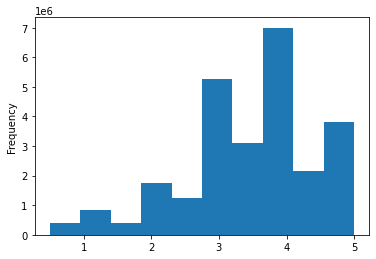

In [80]:
pd.options.display.float_format = '{:20,.2f}'.format
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()